# Preparacion del DataFrame

Importo librerias

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

Leo mi dataset de train

In [ ]:
df = pd.read_parquet('/content/drive/MyDrive/train.parquet')
df.head()

,track_name,lyric,genre,language,popularity,artist,a_genres,a_songs,a_popularity,did,...,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Halo,Remember those walls I built\nWell baby they'r...,Dance,en,79,Beyoncé,Pop; R&B; Black Music,276.0,205.5,NaN,...,0.720,0.0000,B,0.0563,-5.908,Minor,0.0628,79.983,4/4,0.472
1,Halo,Remember those walls I built\nWell baby they'r...,Pop,en,80,Beyoncé,Pop; R&B; Black Music,276.0,205.5,NaN,...,0.720,0.0000,B,0.0563,-5.908,Minor,0.0628,79.983,4/4,0.472
2,Halo,Remember those walls I built\nWell baby they'r...,R&B,en,80,Beyoncé,Pop; R&B; Black Music,276.0,205.5,NaN,...,0.720,0.0000,B,0.0563,-5.908,Minor,0.0628,79.983,4/4,0.472
3,Partition,Driver roll up the partition please\nDriver ro...,Dance,en,71,Beyoncé,Pop; R&B; Black Music,276.0,205.5,NaN,...,0.441,0.0726,B,0.3060,-11.523,Minor,0.2910,185.571,4/4,0.174
4,Partition,Driver roll up the partition please\nDriver ro...,Pop,en,71,Beyoncé,Pop; R&B; Black Music,276.0,205.5,NaN,...,0.441,0.0726,B,0.3060,-11.523,Minor,0.2910,185.571,4/4,0.174


Analizo los generos que tengo

In [ ]:
df['genre'].unique()

array(['Dance', 'Pop', 'R&B', 'Hip-Hop', 'Rap', 'Soul', 'Rock', 'Blues',
       'Folk', 'Jazz', 'Country', 'Alternative', 'Children’s Music',
       'Indie', 'Electronic', 'Classical', 'Opera', 'World', 'Ska',
       'Comedy', 'Reggae', 'Reggaeton', "Children's Music", 'Soundtrack',
       'Anime', 'Movie'], dtype=object)

Corrigo el genero "Children's Music" que esta mal escrito

In [ ]:
df['genre'] = df['genre'].map(lambda x: "Children’s Music" if x=="Children's Music" else x)

Me fijo las columnas que tenemos en nuestro dataset

In [ ]:
df.columns

Index(['track_name', 'lyric', 'genre', 'language', 'popularity', 'artist',
       'a_genres', 'a_songs', 'a_popularity', 'did', 's-label', 'acousticness',
       'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'speechiness', 'tempo',
       'time_signature', 'valence'],
      dtype='object')

# Barplot: palabras en una cancion



Me deshago de los nulos

In [ ]:
df_palabras = df[~df['lyric'].isna()]

In [ ]:
df_palabras['cantPalabras'] = df_palabras['lyric'].map(lambda x: len(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Ordeno de mayor a menor para mostrarlo correctamente en el plot

In [ ]:
orden_palabras = df_palabras.groupby(['genre'])['cantPalabras'].mean().sort_values(ascending=False).index

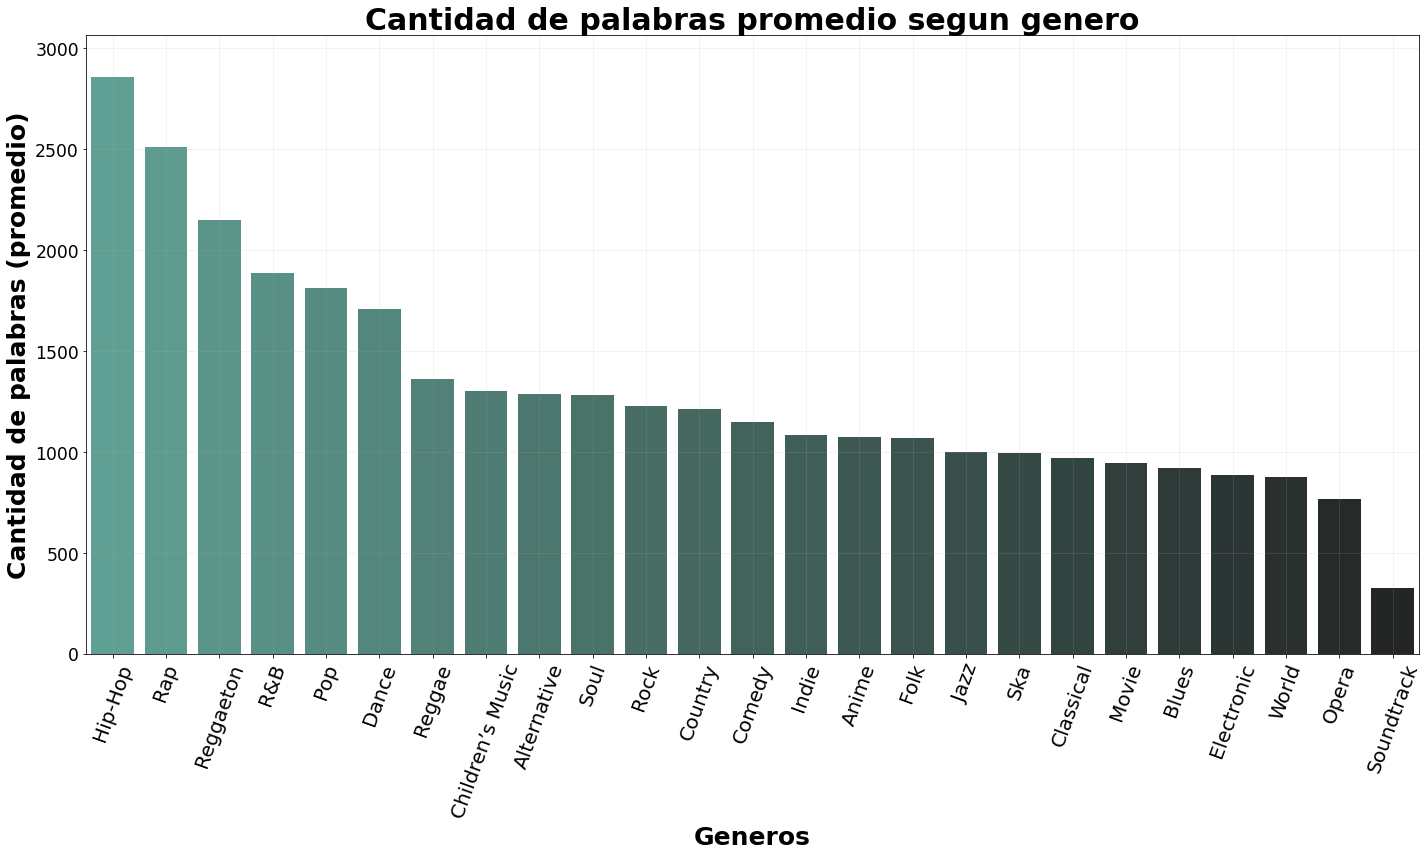

In [ ]:
plt.figure(figsize = [20,12])
sns.barplot(data=df_palabras, x="genre", y="cantPalabras", order=orden_palabras, palette=sns.color_palette("dark:#5A9_r",n_colors=25), errwidth=0,dodge=True)
plt.xlabel("Generos" , size = 25, fontweight='bold') 
plt.ylabel("Cantidad de palabras (promedio)" , size = 25, fontweight='bold') 
plt.title("Cantidad de palabras promedio segun genero" , size = 30, fontweight='bold')
plt.xticks(rotation = 70, size=20) 
plt.yticks(size='xx-large')
plt.grid(alpha = 0.2)
plt.tight_layout()

# Barplot: energia de las canciones segun el genero

In [ ]:
orden_energia = df.groupby(['genre'])['energy'].mean().sort_values(ascending=False).index

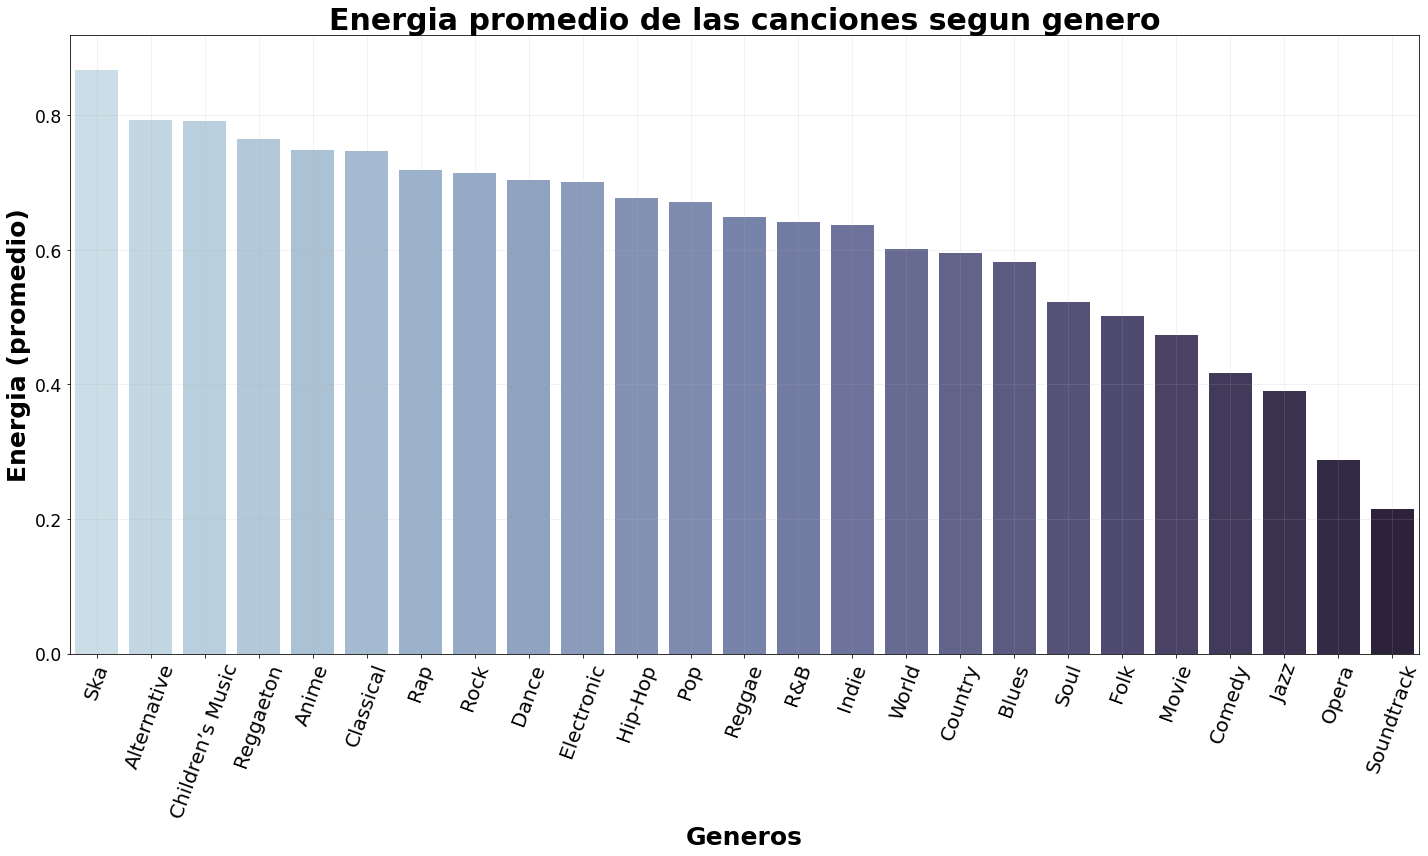

In [ ]:
plt.figure(figsize = [20,12])
sns.barplot(data=df, x="genre", y='energy',order=orden_energia,palette=sns.color_palette("ch:s=.25,rot=-.25",n_colors=25), errwidth=0)
plt.xlabel("Generos" , size = 25, fontweight='bold') 
plt.ylabel("Energia (promedio)" , size = 25, fontweight='bold') 
plt.title("Energia promedio de las canciones segun genero" , size = 30, fontweight='bold')
plt.xticks(rotation = 70, size=20) 
plt.yticks(size='xx-large')
plt.grid(alpha = 0.2)
plt.tight_layout()

# Boxplot: popularidad de las cancinoes segun el genero

In [ ]:
orden_popularidad = df.groupby(['genre'])['popularity'].mean().sort_values(ascending=False).index

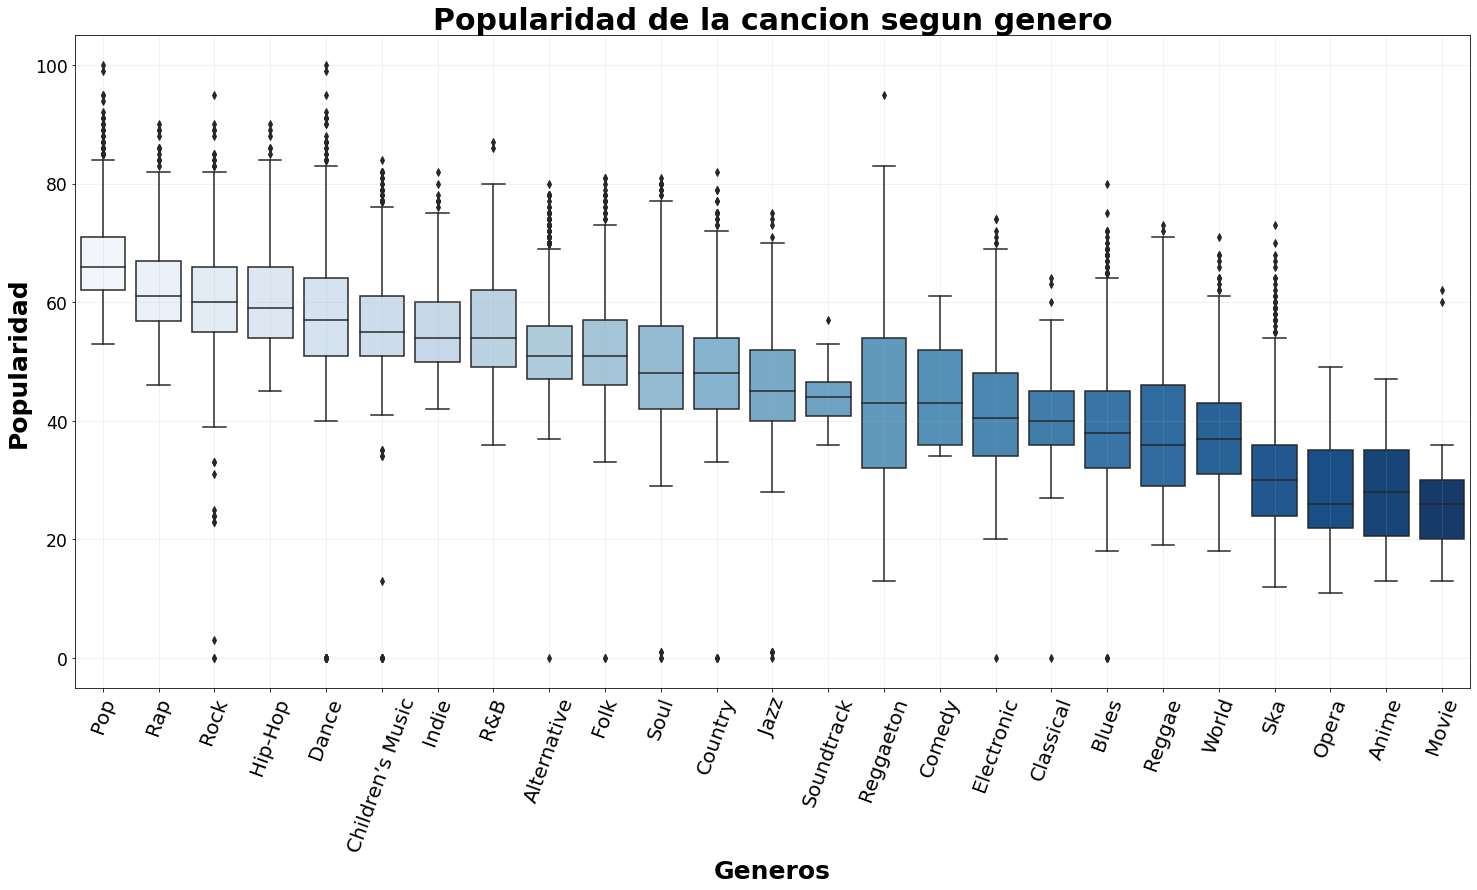

In [ ]:
plt.figure(figsize = [25,12])
sns.boxplot(data=df, x="genre", y='popularity',order=orden_popularidad,palette='Blues')
plt.xlabel("Generos" , size = 25, fontweight='bold') 
plt.ylabel("Popularidad" , size = 25, fontweight='bold') 
plt.title("Popularidad de la cancion segun genero" , size = 30, fontweight='bold')
plt.xticks(rotation = 70, size=20) 
plt.yticks(size='xx-large')
plt.grid(alpha = 0.2)

# Heatmap: cantidad de canciones en cada key por genero

In [ ]:
df_heatmap = df.groupby(['genre','key']).count().reset_index()[['genre','key','track_name']]
df_heatmap

,genre,key,track_name
0,Alternative,A,321
1,Alternative,A#,145
2,Alternative,B,266
3,Alternative,C,346
4,Alternative,C#,266
...,...,...,...
281,World,E,45
282,World,F,36
283,World,F#,35
284,World,G,66


In [ ]:
cantCancionesGenero = dict(df.groupby(['genre']).count()['track_name'])
df_heatmap['total'] = df_heatmap['genre'].map(lambda x: cantCancionesGenero[x])
df_heatmap['Relacion'] = df_heatmap['track_name']/df_heatmap['total']
df_heatmap

,genre,key,track_name,total,Relacion
0,Alternative,A,321,3025,0.106116
1,Alternative,A#,145,3025,0.047934
2,Alternative,B,266,3025,0.087934
3,Alternative,C,346,3025,0.114380
4,Alternative,C#,266,3025,0.087934
...,...,...,...,...,...
281,World,E,45,487,0.092402
282,World,F,36,487,0.073922
283,World,F#,35,487,0.071869
284,World,G,66,487,0.135524


In [ ]:
matrix = df_heatmap.pivot_table(values='Relacion',index='genre',columns='key',fill_value=0)
matrix = matrix*100
matrix = matrix.round()
matrix

key,A,A#,B,C,C#,D,D#,E,F,F#,G,G#
genre,,,,,,,,,,,,
Alternative,11.0,5.0,9.0,11.0,9.0,11.0,3.0,8.0,7.0,7.0,11.0,7.0
Anime,13.0,9.0,9.0,11.0,17.0,4.0,4.0,2.0,9.0,11.0,6.0,6.0
Blues,15.0,5.0,6.0,12.0,5.0,14.0,3.0,7.0,8.0,4.0,15.0,5.0
Children’s Music,10.0,5.0,9.0,12.0,9.0,12.0,3.0,8.0,7.0,8.0,11.0,7.0
Classical,7.0,5.0,10.0,9.0,14.0,7.0,9.0,11.0,4.0,5.0,8.0,11.0
Comedy,11.0,5.0,0.0,16.0,16.0,14.0,5.0,11.0,3.0,5.0,8.0,5.0
Country,11.0,6.0,6.0,13.0,6.0,13.0,5.0,9.0,6.0,6.0,14.0,5.0
Dance,8.0,6.0,8.0,13.0,11.0,8.0,2.0,7.0,9.0,8.0,12.0,7.0
Electronic,11.0,9.0,8.0,11.0,10.0,10.0,1.0,7.0,8.0,7.0,12.0,6.0


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5]), <a list of 25 Text major ticklabel objects>)

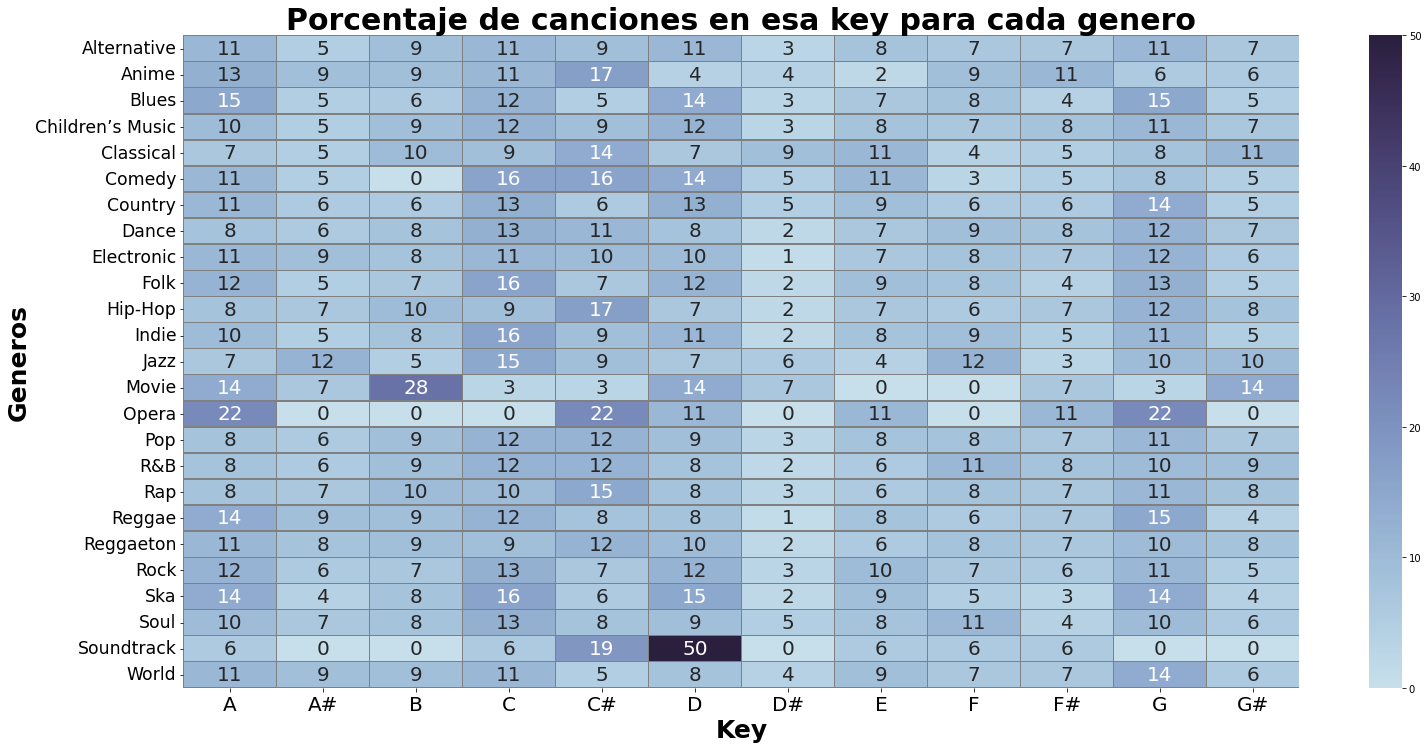

In [ ]:
plt.figure(figsize=(25,12))
sns.heatmap(matrix, square=False, cmap=sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True), annot=True,annot_kws={'size': 20},linewidths=0.5,linecolor='grey')
plt.ylabel("Generos" , size = 25, fontweight='bold') 
plt.xlabel("Key" , size = 25, fontweight='bold') 
plt.title("Porcentaje de canciones en esa key para cada genero" , size = 30, fontweight='bold')
plt.xticks(size=20) 
plt.yticks(size='xx-large')

# Heatmap: cantidad de canciones en tempo por genero

Redondeo el tempo para poder mejorar el plot

In [ ]:
df['tempo'] = df['tempo'].map(lambda x: round(x/10)*10)
df

,track_name,lyric,genre,language,popularity,artist,a_genres,a_songs,a_popularity,did,...,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Halo,Remember those walls I built\nWell baby they'r...,Dance,en,79,Beyoncé,Pop; R&B; Black Music,276.0,205.5,NaN,...,0.720,0.000000,B,0.0563,-5.908,Minor,0.0628,80,4/4,0.472
1,Halo,Remember those walls I built\nWell baby they'r...,Pop,en,80,Beyoncé,Pop; R&B; Black Music,276.0,205.5,NaN,...,0.720,0.000000,B,0.0563,-5.908,Minor,0.0628,80,4/4,0.472
2,Halo,Remember those walls I built\nWell baby they'r...,R&B,en,80,Beyoncé,Pop; R&B; Black Music,276.0,205.5,NaN,...,0.720,0.000000,B,0.0563,-5.908,Minor,0.0628,80,4/4,0.472
3,Partition,Driver roll up the partition please\nDriver ro...,Dance,en,71,Beyoncé,Pop; R&B; Black Music,276.0,205.5,NaN,...,0.441,0.072600,B,0.3060,-11.523,Minor,0.2910,190,4/4,0.174
4,Partition,Driver roll up the partition please\nDriver ro...,Pop,en,71,Beyoncé,Pop; R&B; Black Music,276.0,205.5,NaN,...,0.441,0.072600,B,0.3060,-11.523,Minor,0.2910,190,4/4,0.174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34332,A Tu Vera,To your side To your side always the verita yo...,World,None,19,Gipsy Kings,World Music; Dance; Regional,89.0,1.0,101102.0,...,0.822,0.000003,E,0.1650,-8.063,Minor,0.0561,120,4/4,0.748
34333,No Volvere,Amor mio\r\nAmor mio por favor\r\nTu no te vas...,World,None,34,Gipsy Kings,World Music; Dance; Regional,89.0,1.0,101111.0,...,0.369,0.011100,E,0.2310,-12.515,Minor,0.0353,80,4/4,0.868
34334,Bolerias,Bolerias is instrumental\n\n\n\n,World,None,18,Gipsy Kings,World Music; Dance; Regional,89.0,1.0,101114.0,...,0.566,0.812000,F#,0.1440,-14.200,Minor,0.0405,120,3/4,0.793
34335,Como Ayer,Yo quiero ser si otra vez llegaras\r\nYo quier...,World,None,28,Gipsy Kings,World Music; Dance; Regional,89.0,1.0,101115.0,...,0.553,0.000866,C,0.1390,-8.851,Major,0.0376,90,4/4,0.738


In [ ]:
df_heatmap = df.groupby(['genre','tempo']).count().reset_index()[['genre','tempo','track_name']]
df_heatmap

,genre,tempo,track_name
0,Alternative,50,6
1,Alternative,60,4
2,Alternative,70,27
3,Alternative,80,198
4,Alternative,90,291
...,...,...,...
373,World,170,19
374,World,180,18
375,World,190,4
376,World,200,3


In [ ]:
cantCancionesGenero = dict(df.groupby(['genre']).count()['track_name'])
df_heatmap['total'] = df_heatmap['genre'].map(lambda x: cantCancionesGenero[x])
df_heatmap['Relacion'] = df_heatmap['track_name']/df_heatmap['total']
df_heatmap

,genre,tempo,track_name,total,Relacion
0,Alternative,50,6,3025,0.001983
1,Alternative,60,4,3025,0.001322
2,Alternative,70,27,3025,0.008926
3,Alternative,80,198,3025,0.065455
4,Alternative,90,291,3025,0.096198
...,...,...,...,...,...
373,World,170,19,487,0.039014
374,World,180,18,487,0.036961
375,World,190,4,487,0.008214
376,World,200,3,487,0.006160


In [ ]:
matrix = df_heatmap.pivot_table(values='Relacion',index='genre',columns='tempo',fill_value=0)
matrix = matrix*100
matrix

tempo,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220
genre,,,,,,,,,,,,,,,,,,,,
Alternative,0.000000,0.000000,0.198347,0.132231,0.892562,6.545455,9.619835,11.438017,9.355372,12.495868,11.140496,11.206612,7.801653,6.446281,5.917355,4.099174,1.619835,1.024793,0.066116,0.000000
Anime,0.000000,0.000000,0.000000,0.000000,2.127660,8.510638,12.765957,10.638298,2.127660,0.000000,21.276596,19.148936,6.382979,6.382979,6.382979,4.255319,0.000000,0.000000,0.000000,0.000000
Blues,0.000000,0.000000,0.066534,0.399202,3.526281,8.915502,8.383234,10.978044,10.911510,13.772455,12.840985,9.048570,6.986028,3.659348,4.790419,3.193613,0.998004,1.264138,0.199601,0.066534
Children’s Music,0.000000,0.000000,0.210822,0.140548,0.843289,6.886859,9.943781,12.016866,8.678848,11.841181,11.103303,11.243851,7.976107,5.903022,6.043570,4.216444,1.686578,1.159522,0.105411,0.000000
Classical,0.000000,0.000000,0.000000,1.360544,0.680272,7.482993,12.925170,12.244898,8.843537,14.285714,11.564626,6.802721,8.163265,6.122449,6.802721,2.721088,0.000000,0.000000,0.000000,0.000000
Comedy,0.000000,0.000000,2.702703,0.000000,5.405405,8.108108,5.405405,21.621622,16.216216,5.405405,16.216216,10.810811,2.702703,0.000000,5.405405,0.000000,0.000000,0.000000,0.000000,0.000000
Country,0.000000,0.000000,0.000000,0.421053,2.877193,10.666667,9.192982,10.456140,10.385965,10.245614,12.631579,10.456140,5.614035,7.438596,4.350877,2.596491,1.192982,1.052632,0.350877,0.070175
Dance,0.000000,0.000000,0.067545,0.371496,1.519757,7.193516,8.915907,14.015535,10.165485,15.873016,14.927389,8.240459,5.741304,4.863222,4.221547,1.789936,1.046944,0.979399,0.067545,0.000000
Electronic,0.000000,0.000000,0.111607,0.558036,1.785714,5.915179,7.254464,8.593750,10.491071,20.089286,18.080357,8.816964,6.473214,3.794643,3.906250,2.120536,1.227679,0.446429,0.000000,0.334821


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5]), <a list of 25 Text major ticklabel objects>)

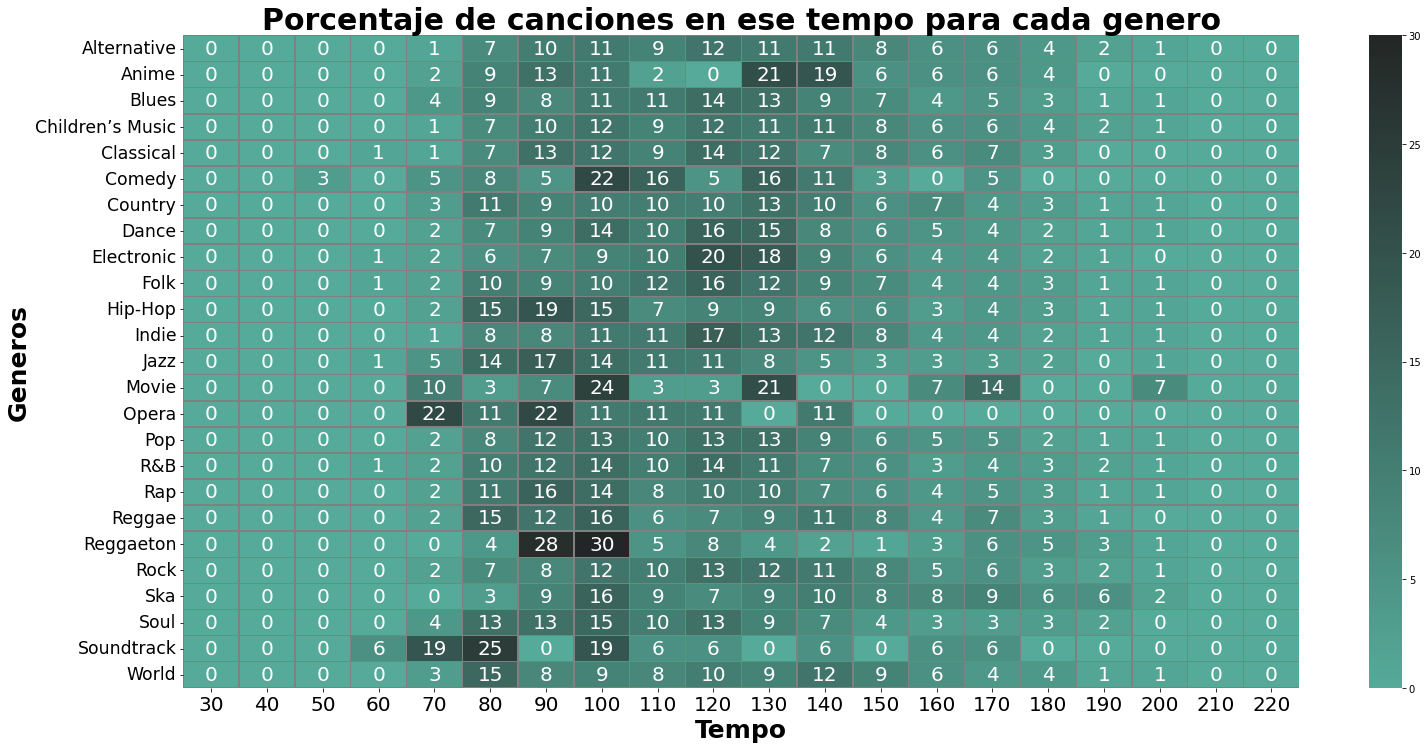

In [ ]:
plt.figure(figsize=(25,12))
sns.heatmap(matrix.round(), square=False, cmap=sns.color_palette("dark:#5A9_r", as_cmap=True), annot=True,annot_kws={'size': 20},linewidths=0.5,linecolor='grey')
plt.ylabel("Generos" , size = 25, fontweight='bold') 
plt.xlabel("Tempo" , size = 25, fontweight='bold') 
plt.title("Porcentaje de canciones en ese tempo para cada genero" , size = 30, fontweight='bold')
plt.xticks(size=20) 
plt.yticks(size='xx-large')

# Boxplot: valence segun generos

In [ ]:
orden_valance = df.groupby(['genre'])['valence'].mean().sort_values(ascending=False).index

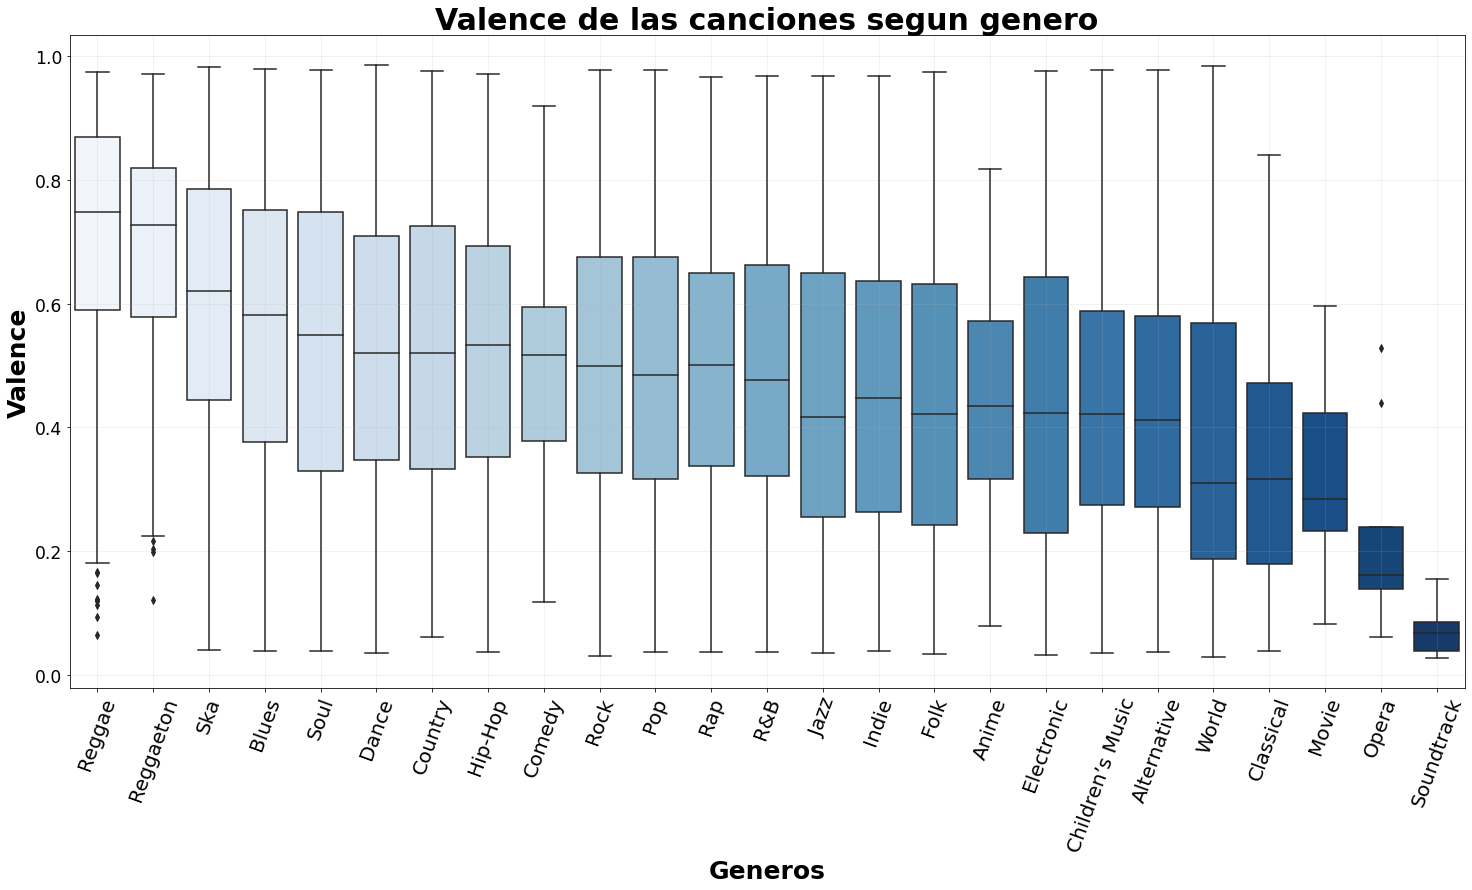

In [ ]:
plt.figure(figsize = [25,12])
sns.boxplot(data=df, x="genre", y='valence',order=orden_valance,palette='Blues')
plt.xlabel("Generos" , size = 25, fontweight='bold') 
plt.ylabel("Valence" , size = 25, fontweight='bold') 
plt.title("Valence de las canciones segun genero" , size = 30, fontweight='bold')
plt.xticks(rotation = 70, size=20) 
plt.yticks(size='xx-large')
plt.grid(alpha = 0.2)